In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression
from matplotlib import cm

In [5]:
df = []
df.append(pd.read_csv(r'C:\Users\Superadmin\Desktop\Bachelorarbeit\dataAnalysis\csi_data_max_distance.csv'))
df.append(pd.read_csv(r'C:\Users\Superadmin\Desktop\Bachelorarbeit\dataAnalysis\csi_data_walls.csv'))
df.append(pd.read_csv(r'C:\Users\Superadmin\Desktop\Bachelorarbeit\dataAnalysis\csi_data_outside.csv'))
df.append(pd.read_csv(r'C:\Users\Superadmin\Desktop\Bachelorarbeit\dataAnalysis\csi_data_walls_steel.csv'))

X = []
Y = []

x_axis = "std"
y_axis = "correlation"
z_axis = "rssi"

for i in range(len(df)):
    temp_X = []
    temp_Y = []
    for j in range(len(df[i])):
        temp_X.append([float(df[i][x_axis][j]), float(df[i][y_axis][j]), 1])
        temp_Y.append(float(df[i][z_axis][j]))
    temp_X = np.array(temp_X)
    temp_Y = np.array(temp_Y)
    X.append(temp_X)
    Y.append(temp_Y)


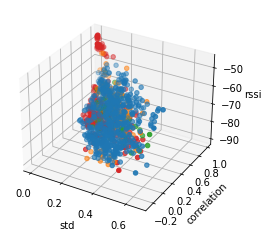

In [6]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1, projection='3d')
for i in range(len(X)):
    ax.scatter(X[i][:,0],X[i][:,1],Y[i])
ax.set_xlabel(x_axis)
ax.set_ylabel(y_axis)
ax.set_zlabel(z_axis)
#plt.show()
plt.savefig(x_axis + '-' + y_axis + '-' + z_axis + '_04-07.png')

In [7]:
w = np.linalg.solve(np.dot(X.T, X), np.dot(X.T, Y))
Yhat = np.dot(X, w)

AttributeError: 'list' object has no attribute 'T'

In [ ]:
d1 = Y - Yhat
d2 = Y - Y.mean()
r2 = 1 - d1.dot(d1) / d2.dot(d2)
print("The r-squared value is: ", r2)

The r-squared value is:  0.34884411844297625


In [ ]:
X_test = np.array([0.5, 1, 1])
X_test.shape
X_test = X_test.reshape(-1,3)
print(np.dot(X_test, w))

[-15.33306775]


In [ ]:
lr = LinearRegression()
lr.fit(X,Y)
y_predict = lr.predict(X)

In [ ]:
#For polynomial regression
X = []
Y = []

for i in range(len(df)):
    X.append([float(df['std'][i]), float(df['correlation'][i]), 1])
    Y.append(float(df['distance'][i]))
    
X = np.array(X)
Y = np.array(Y)